In [1]:
import splat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from astropy.visualization import ZScaleInterval
import matplotlib
import wisps
import wisps.simulations as wispsim
import seaborn as sns
import matplotlib.colors as mcolors

from astropy.coordinates import SkyCoord
import astropy.coordinates as astrocoord
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['font.size'] = 18
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1)/2)
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [3]:
mymap_r=mymap.reversed(name='revers')

In [4]:
print ('helo')

helo


In [5]:
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.Series(x.indices)
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]

def reclassify(s):
    if s is None:
        return None
    #spt_unc=s.spectral_type[1
    #rngs=[[1.17,1.35],[1.45,1.67]]
    rngs=[1.17, 1.67]
    #spt,spt_e = splat.classifyByStandard(s.splat_spectrum,fit_ranges=rngs, average=True)
    #s.classify_by_standard(comprange=rngs)
    #print(wisps.make_spt_number(spt))
    spt, spt_e=wisps.classify_by_templates(s, comprange=rngs)
    s.spectral_type=(np.round(wisps.make_spt_number(spt)), spt_e)
    s.calculate_distance(use_spt_unc=True, use_index_type=False)
    
    return s
    


In [6]:
#jklj

In [7]:
rngo=np.array([[1.2,1.35],[1.45,1.65]])
rng1=np.array([1.2, 1.6])


In [8]:
len(np.shape(rngo))

2

In [9]:
#read in the data
cands0=pd.read_hdf(wisps.LIBRARIES+'/objects_of_interest.h5', key='all')

FileNotFoundError: File /Users/caganze/research/wisps//libraries/objects_of_interest.h5 does not exist

In [ ]:
spectra= [reclassify(x) for x in cands0.spectra]

In [ ]:
cands0['spectra']=spectra

In [ ]:
cands=cands0.spectra.apply(get_indices)
cands['spectra']=cands0.spectra

In [ ]:
cands['grism_id']=cands0.grism_id
cands['spt']=cands0.spectra.apply(get_spt)

In [ ]:
canddf=cands[~cands.spectra.isna()].reset_index(drop=True)

In [ ]:
canddf['spt']=canddf.spectra.apply(lambda x: x.spectral_type[0])
canddf['spt_er']=canddf.spectra.apply(lambda x: x.spectral_type[1])
canddf['distance']=canddf.spectra.apply(lambda x: x.distance['val'].value)
canddf['distance_er']=canddf.spectra.apply(lambda x: x.distance['er'].value)
canddf['coord']=canddf.spectra.apply(lambda x:x.coords)
canddf['designation']=canddf.spectra.apply(lambda x: x.designation)
#canddf['index_type_er']=canddf.spectra.apply(lambda x: x.index_type[1])

In [ ]:
canddfj=canddf.join(canddf.spectra.apply(lambda x: pd.Series(x.mags)))
canddff=canddfj.join(canddf.spectra.apply(lambda x: pd.Series(x.snr)))
canddff['spectra']=canddf.spectra

canddff=canddff.drop_duplicates('designation')

In [ ]:
#noisy and re-checked objects
exclude=['J01253527-0001383', 'J20220361-3113264', 
         'J05300520-0723374', 'J05315184-0723016',
         'J14313999+2447186', 'J15343866+5014150']

In [ ]:
#canddff.designation.str.upper()

In [ ]:
#canddff[canddff.designation.str.upper().isin(exclude)]

In [ ]:
ucds=wisps.Annotator.reformat_table((canddff[(canddff.spt>=17) & \
                                             (~(canddff.designation.str.upper().isin(exclude))) \
&(canddff.snr1 >=3.)]).reset_index(drop=True)).sort_values(by='spt')

In [ ]:

#%prun 

In [ ]:
#ghj

In [ ]:
#remove some objects by name
ucds=(ucds[~ ucds.grism_id.isin(['par199-00124'])]).reset_index(drop=True).sort_values(by='spt')

In [ ]:

################start here
######################
hjkl

In [10]:
splat.STDS_DWARF_SPEX

{'M0.0': SPEX-PRISM spectrum of Gliese 270 (M0.0),
 'M1.0': SPEX-PRISM spectrum of Gl424 (M1.0),
 'M2.0': SPEX-PRISM spectrum of Gliese 91 (M2.0),
 'M3.0': SPEX-PRISM spectrum of Gl752A (M3.0),
 'M4.0': SPEX-PRISM spectrum of Gliese 213 (M4.0),
 'M5.0': SPEX-PRISM spectrum of Wolf 47 (M5.0),
 'M6.0': SPEX-PRISM spectrum of LHS 1375 (M6.0),
 'M7.0': SPEX-PRISM spectrum of VB 8 (M7.0),
 'M8.0': SPEX-PRISM spectrum of VB 10 (M8.0),
 'M9.0': SPEX-PRISM spectrum of LHS 2924 (M9.0),
 'L0.0': SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0),
 'L1.0': SPEX-PRISM spectrum of 2MASSW J2130446-084520 (L1.0),
 'L2.0': SPEX-PRISM spectrum of Kelu-1 (L2.0),
 'L3.0': SPEX-PRISM spectrum of 2MASSW J1506544+132106 (L3.0),
 'L4.0': SPEX-PRISM spectrum of 2MASS J21580457-1550098 (L4.0),
 'L5.0': SPEX-PRISM spectrum of SDSS J083506.16+195304.4 (L5.0),
 'L6.0': SPEX-PRISM spectrum of 2MASSI J1010148-040649 (L6.0),
 'L7.0': SPEX-PRISM spectrum of 2MASSI J0103320+193536 (L7.0),
 'L8.0': SPEX-PRISM spectrum

In [11]:
ucds=pd.read_pickle('~/research/wisps/libraries/real_ucds.pkl')

In [12]:
#ignore unselected
ucds=ucds[ucds.selection !=''].reset_index(drop=True)

In [13]:
#ucds

In [14]:
ucds[ucds.spt_er>5][['snr1', 'F110W', 'F140W', 'F160W', 'designation', 'spt_er', 'spt']]

,snr1,F110W,F140W,F160W,designation,spt_er,spt
201,4.580164,NaN,24.401167,24.742002,J10001529+0221196,5.024938,23.0
205,4.476141,NaN,24.511110,24.955962,J10004273+0220589,6.020797,24.0


In [15]:
len(ucds[ucds.spt.between(17, 19)]), len(ucds[ucds.spt.between(20, 29)]), len(ucds[ucds.spt.between(30, 40)])

(185, 30, 11)

In [16]:
#tdwarfs.iloc[tdwarfs.distance.argmax()][['distance', 'distance_er']]

In [17]:
OBSERVED_POINTINGS =pd.read_pickle(wisps.OUTPUT_FILES+'/pointings.pkl')


In [18]:
mdwarfs=(ucds.sort_values('spt')[ucds.spt.between(17, 20)])
ldwarfs=(ucds.sort_values('spt')[ucds.spt.between(20, 30)])
tdwarfs=(ucds.sort_values('spt')[ucds.spt.between(30, 40)])

coords=SkyCoord(ucds.coord.values)

galoc=coords.transform_to(astrocoord.Galactocentric(galcen_distance=8.3*u.kpc))
x, y, z=galoc.cartesian.xyz

r=(x**2+y**2)**0.5

ucds['pointing']=ucds.grism_id.apply(wispsim.get_proper_pointing)
pntcoords=SkyCoord([x.coord for x in OBSERVED_POINTINGS 
                    if not (x.name.lower() in ucds.pointing.str.lower().values)])

In [19]:
#plt.style.use('dark_background')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


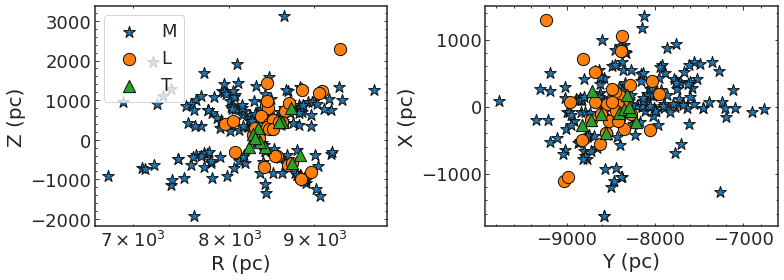

In [20]:
fig, (ax, ax1)=plt.subplots(figsize=(11, 4), ncols=2)

sc=ax.scatter(r[mdwarfs.index], z[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111', label='M')
sc=ax.scatter(r[ldwarfs.index], z[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111', label='L')
sc=ax.scatter(r[tdwarfs.index], z[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111', label='T')

ax.minorticks_on()

sc=ax1.scatter(x[mdwarfs.index], y[mdwarfs.index], s=150, cmap='coolwarm',  marker='*', edgecolors='#111111')
sc=ax1.scatter(x[ldwarfs.index], y[ldwarfs.index], s=150, cmap='coolwarm',  marker='o', edgecolors='#111111')
sc=ax1.scatter(x[tdwarfs.index], y[tdwarfs.index], s=150, cmap='coolwarm',  marker='^', edgecolors='#111111')

ax.minorticks_on()



ax.set_ylabel('Z (pc)', fontsize=20)
ax.set_xlabel('R (pc)', fontsize=20)
ax1.set_ylabel('X (pc)', fontsize=20)
ax1.set_xlabel('Y (pc)', fontsize=20)

ax.minorticks_on()
ax1.minorticks_on()


#add the sun
#Rsun=83000.
#Zsun=27.

#ax1.scatter(0., 0.)
#ax.scatter(8300, 27., marker='')
ax.legend()
#plt.grid(color='#7FDBFF')
#mplcyberpunk.make_lines_glow(ax)
#mplcyberpunk.make_lines_glow(ax1)
ax.set_xscale('log')


plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_distances.pdf', bbox_inches='tight')

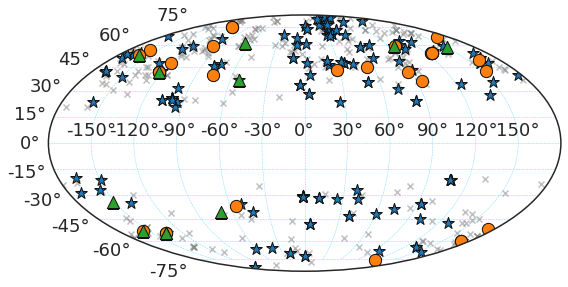

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(pntcoords.galactic.l.wrap_at(180*u.deg).radian, pntcoords.galactic.b.wrap_at(180*u.deg).radian, c='grey', marker='x', alpha=0.5)

c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[mdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[mdwarfs.index], 
             marker='*', edgecolors='#111111', s=150)
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[ldwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[ldwarfs.index], 
             marker='o', edgecolors='#111111', s=150)
c=ax.scatter(galoc.galactic.l.wrap_at(180*u.deg).radian[tdwarfs.index], galoc.galactic.b.wrap_at(180*u.deg).radian[tdwarfs.index], 
             marker='^', edgecolors='#111111', s=150)




             

#plt.xlabel("l", fontsize=18)
#plt.ylabel("b", fontsize=18)
plt.grid(color='#7FDBFF')
plt.minorticks_on()
#mplcyberpunk.make_lines_glow(ax)

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/candidate_skymap.pdf', bbox_inches='tight')

In [22]:
#4*533*0.1

In [23]:
bucds=abs(galoc.galactic.b.wrap_at(180*u.deg).to(u.deg).value)
bpnts=abs(pntcoords.galactic.l.wrap_at(180*u.deg).to(u.deg).value)

areanorth= len(bpnts[np.logical_and(bpnts >0, bpnts <= 30.) ])*4.1*(u.arcmin**2)
areamid= len(bpnts[np.logical_and(bpnts >30, bpnts <= 60.) ])*4.1*(u.arcmin**2)
areasouth= len(bpnts[np.logical_and(bpnts >30, bpnts <= 90.) ])*4.1*(u.arcmin**2)

print ('ucds density in north {}'.format(len(bucds[np.logical_and(bucds >0, bucds <= 30.) ])/areanorth))
print ('ucds density in middle {}'.format(len(bucds[np.logical_and(bucds >30, bucds <=60) ])/areamid))
print ('ucds density in south {}'.format(len(bucds[np.logical_and(bucds >60, bucds <=90) ])/areasouth))

ucds density in north 0.21026072329688816 1 / arcmin2
ucds density in middle 1.5040650406504066 1 / arcmin2
ucds density in south 0.21191523390643746 1 / arcmin2


In [24]:
#np.array(list(mdwarfs.index))

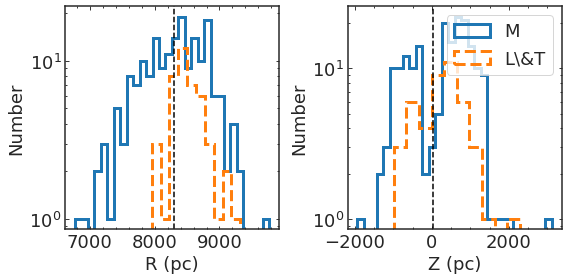

In [25]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(8, 4))

h=ax.hist(r.value[mdwarfs.index], bins=30, histtype='step', linewidth=3, log=True)
h=ax1.hist(z.value[mdwarfs.index], bins=30, histtype='step', linewidth=3, log=True, label='M')

h=ax.hist(r.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
                                 histtype='step', linewidth=3, linestyle='--', log=True)
h=ax1.hist(z.value[np.concatenate([list(ldwarfs.index), list(tdwarfs.index)])],\
           histtype='step', linewidth=3, linestyle='--', log=True, label='L\&T')

#h=ax.hist(r.value[tdwarfs.index], histtype='step', linewidth=3, linestyle=':', log=True)
#h=ax1.hist(z.value[tdwarfs.index],  histtype='step', linewidth=3, linestyle=':', log=True)

ax.axvline(8300, c='k', linestyle='--')
ax1.axvline(27, c='k', linestyle='--')
#ax1.text(27, 1, s=r'\u2609')

ax.set_xlabel('R (pc)')
ax1.set_xlabel('Z (pc)')
for a in [ax, ax1]:
    a.minorticks_on()
    a.set_ylabel('Number')
plt.tight_layout()
ax1.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/rz_distribution.pdf',  bbox_inches='tight',  facecolor='white', transparent=False)

In [26]:
#favorite T dwarf
fav_t=tdwarfs.iloc[-3].spectra
import glob
from astropy.io import fits
from matplotlib import gridspec
from astropy.visualization import ZScaleInterval
from matplotlib.colors import LogNorm

In [27]:
fav_sppath=glob.glob('/volumes/burgasserlab/Surveys//goods*/goodss-01/goodss-01*G141*_sci.fits')[0]
fav_impath=glob.glob('/volumes/burgasserlab/Surveys//goods*/goodss-01/goodss-01*F1*drz_sci.fits')[0]

In [28]:
#fav_sppath

In [29]:
def plot_image(image, ax, cmap='binary', alpha=0.1):
    mask=image<5.*np.nanstd(image)
    vmin, vmax=ZScaleInterval().get_limits( image[mask])
    #norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)
    #print (vmin)
    #norm=LogNorm(vmin=, vmax=vmax)
    grid=np.mgrid[0:image.shape[0]:1, 0:image.shape[1]:1]
    ax.pcolormesh(grid[0], grid[1], 
       image, cmap=cmap,
       rasterized=True,   norm=matplotlib.colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                  alpha=alpha)

    #ax.plot(image_data['center'][0], 
    #image_data['center'][1], marker='+',c='#111111', ms=30)


In [30]:
#fav_t.photo_image.

img0=fits.open(fav_impath)[0].data
fig, ax=plt.subplots(figsize=(8, 8))
plot_image(img0, ax, cmap='cubehelix')
plot_image(img0, ax, cmap='inferno', alpha=0.2)
plot_image(img0, ax, cmap='gist_gray', alpha=0.05)

ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_image.pdf', bbox_inches='tight',  facecolor='black', transparent=False)

In [31]:
fits.open(fav_sppath)#[0].data

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff64cb1eca0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff64cd87340>]

img1=fits.open(fav_sppath)[0].data
fig, ax=plt.subplots(figsize=(8, 8))


plot_image(img1, ax, cmap='cubehelix')
plot_image(img1, ax, cmap='inferno', alpha=0.2)
plot_image(img1, ax, cmap='gist_gray', alpha=0.05)

ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_spectra.pdf', bbox_inches='tight',  facecolor='black', transparent=False)

fig, ax=plt.subplots(figsize=(17,8), ncols=2)
plot_image(img0, ax[0], cmap='cubehelix')
plot_image(img0, ax[0], cmap='inferno', alpha=0.2)
plot_image(img0, ax[0], cmap='gist_gray', alpha=0.05)

plot_image(img1, ax[1], cmap='cubehelix')
plot_image(img1, ax[1], cmap='inferno', alpha=0.2)
plot_image(img1, ax[1], cmap='gist_gray', alpha=0.05)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
#ax.set_title('F140W ', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/example_spectra_and_image.pdf', bbox_inches='tight',  \
            facecolor='white', transparent=False)

In [32]:
df=wisps.get_big_file()

In [33]:
fav_t.pixels_per_image

100

In [34]:
#so= wisps.Source(filename='goodss-01-G141_48019')
s1= wisps.Source(filename=df.grism_id.sample().values[0])
#s3=wisps.Source(filename='goodss-01-G141_47749')
#s4=wisps.Source(filename='goodss-01-G141_45524')

In [35]:
s1

par162-00090

In [36]:
#p=wisps.plot_spectrum.plot_source(s4, compare_to_std=False, show_bands=False, save=True, 
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission.pdf')
#p=wisps.plot_spectrum.plot_source(s3, compare_to_std=False, show_bands=False, save=True,
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission2.pdf')
#p=wisps.plot_spectrum.plot_source(s1, compare_to_std=False, show_bands=False, save=True,
#                                  filename=wisps.OUTPUT_FIGURES+'/example_emission3.pdf')

In [37]:
#goodss-01-G141_45524.1D.png
#goodss-01-G141_47749.1D.png
#goodss-01-G141_47995.1D.png
#goodss-01-G141_48019.1D.png

In [38]:
fav_t.filepath

'/volumes/burgasserlab/Surveys/goods/goodss-01/1D/ASCII/goodss-01-G141_45889.1D.ascii'

In [39]:
#fav

In [40]:
#fghjnk

In [41]:
fdf=ucds.sort_values(by='spt')[['grism_id', 'distance', 'spt','spectra']]

In [42]:
def formatted_distance(x):
    d= str(int(round(x.distance['val'].value, 0)))
    der=[str(int(abs(round(x.distance['er'].value[0], 0)))),\
            str(int(abs(round(x.distance['er'].value[0], 0))))]
         
    if abs(x.distance['er'].value[0])/x.distance['val'].value >0.9:
        return "$\\approx$"+d
    else:
        #return r'$'+d+'\substack{+'+der[0]+'\\\ -'+der[-1]+'}$'
        return d+'$^{+'+der[0]+'}'+'_{-'+der[1]+'}$'

In [43]:
formatted_distance(fdf.spectra.iloc[0])

'$\\approx$1580'

In [44]:
latc_df=pd.DataFrame()

In [45]:
#latc_df.iloc[0]['f110']

In [46]:
latc_df=latc_df.replace('nan$\\pm$nan', '\nodata')

In [47]:
#get the right sequence of coplumns
col_list=['designation','grism id', 'f110', 'f140', 'f160', 'snrj', 'spt', 'distance']

In [48]:
#latc_df[latc_df.d]

In [49]:
#don't save, saved in another notebook
#latc_df[col_list].to_latex(wisps.LIBRARIES+'/candidates.tex',
#             header=True, index=False, escape=False, na_rep=' ')

In [50]:
(360**2*u.deg**2).to(u.arcmin**2)

<Quantity 4.6656e+08 arcmin2>

In [51]:
#fghjkl;

In [52]:
fdf=fdf.reset_index(drop=True)

#########################

In [53]:
spdwarf=splat.searchLibrary(giant=False, ucd=True, binary=False)
spdwarf.shortname=spdwarf.DESIGNATION.apply(splat.designationToShortName)
spdwarf=spdwarf[~ ( spdwarf.shortname.isin(wisps.FORBIDDEN_LIST)
               | (spdwarf.H_2MASS_E > 0.4) | (spdwarf.J_2MASS_E > 0.4) | (spdwarf.MEDIAN_SNR <3) )]
#spdwarf=spdwarf[~spdwarf.]
spdwarf.SPEX_TYPE=spdwarf.SPEX_TYPE.apply(wisps.make_spt_number)

In [54]:
def format_jk_zhang(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if row['J'] !='none':
        #print ((row['J']).split('±'))
        #row['J_mag']=(row['J']).split('±')[0]
        #row['J_er']=(row['J']).split('±')[-1]
        jmag=(row['J']).split('±')[0]
        jmag_er=(row['J']).split('±')[1]
        
    if row['H'] !='none':
        #print ((row['H']).split('±'))
        #row['H_mag']=(row['H']).split('±')[0]
        #row['H_er']=(row['H']).split('±')[-1]
        hmag=(row['H']).split('±')[0]
        hmag_er=(row['H']).split('±')[1]
        
    spt=splat.typeToNum(row[' SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

def format_jk_manj(row):
    jmag=np.nan
    hmag=np.nan
    jmag_er=np.nan
    hmag_er=np.nan
    if str(row['J (mag)']) !='nan':
        #ignore others
        if not str(row['J (mag)']).startswith('>'):
            jmag=((row['J (mag)']).split('+or-')[0]).strip()
            jmag_er=((row['J (mag)']).split('+or-')[1]).strip()

    if str(row['H (mag)']) !='nan':
        if not str(row['J (mag)']).startswith('>'):
            hmag=(row['H (mag)']).split('+or-')[0]
            hmag_er=(row['H (mag)']).split('+or-')[1]
        
    spt=splat.typeToNum(row['SpT'])
        
    return pd.Series({'H':jmag, 'J':hmag, 'H_er':hmag_er, 'J_er':jmag_er, 'SpTn':spt})

In [55]:
fdf=ucds
pols=wisps.POLYNOMIAL_RELATIONS
color_pol=pols['colors']

In [56]:
#zhang
zhng=pd.read_csv('~/research/wisps/data/zhang_data.csv')
zhng_clrs=zhng.apply(format_jk_zhang, axis=1 ).applymap(float)

In [57]:
#manjavacas
man_df0=pd.read_csv('/users/caganze/research/wisps/data/manjavaca_phot.txt', sep='\t',  index_col=None)
man_clrs=man_df0.apply(format_jk_manj, axis=1 ).applymap(float)

In [58]:
man_clrs.columns

Index(['H', 'J', 'H_er', 'J_er', 'SpTn'], dtype='object')

In [59]:
fdf['J']=fdf['F140W']+color_pol['j_f140'][0](fdf['spt'])
fdf['J_er']=(fdf['F140W_er']**2+color_pol['j_f140'][1]**2)**0.5

fdf['H']=fdf['F160W']+color_pol['h_f160'][0](fdf['spt'])
fdf['H_er']=(fdf['F160W_er']**2+color_pol['h_f160'][1]**2)**0.5

In [60]:
fdf['J_110']=fdf['F110W']+color_pol['j_f110'][0](fdf['spt'])
fdf['J_110_er']=(fdf['F110W_er']**2+color_pol['j_f110'][1]**2)**0.5

In [61]:
ucd_wisp=fdf[fdf.grism_id.str.startswith('par')]
ucd_hst3d=fdf[~fdf.grism_id.str.startswith('par')]

In [62]:
#remove planets
man_clrs=man_clrs[abs(man_clrs['H']-man_clrs['J']<2)]
spdwarf=spdwarf[(spdwarf['J_2MASS']-spdwarf['H_2MASS']<2) &(spdwarf.SPEX_TYPE >=17.)]

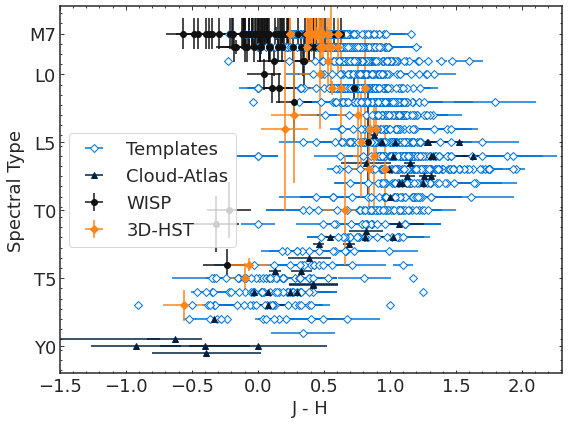

In [63]:
fig, ax=plt.subplots(figsize=(8, 6))



ax.errorbar(spdwarf['J_2MASS']-spdwarf['H_2MASS'], spdwarf.SPEX_TYPE, fmt='D', 
            xerr=(spdwarf.J_2MASS_E**2+spdwarf.H_2MASS_E**2)**0.5, color='#0074D9', 
            mfc='white',  label='Templates')

#ax.errorbar(spsubdwarf['J_2MASS']-spsubdwarf['H_2MASS'],spsubdwarf.SPEX_TYPE, fmt='D', 
#            xerr=(spsubdwarf.J_2MASS_E**2+spsubdwarf.H_2MASS_E**2)**0.5, color='#2ECC40', mfc='white', label='Spex Subdwarfs')

ax.errorbar(-man_clrs['J']+man_clrs['H'], man_clrs['SpTn'], fmt='^', 
            xerr=(man_clrs['J_er']**2+man_clrs['H_er']**2)**0.5, color='#001f3f', label='Cloud-Atlas')

#ax.errorbar(-zhng_clrs['J']+zhng_clrs['H'],zhng_clrs.SpTn, fmt='*', 
#            xerr=(zhng_clrs.J_er**2+zhng_clrs.H_er**2)**0.5, color='#FF4136', label='Primeval')



ax.errorbar(ucd_wisp['J_110']-ucd_wisp['H'], ucd_wisp['spt'], fmt='o', 
            xerr=(ucd_wisp['J_110_er']**2+ucd_wisp['H_er']**2)**0.5, 
            yerr=ucd_wisp['spt_er'], color='#111111', label=r'WISP')

ax.errorbar(ucd_hst3d['J']-ucd_hst3d['H'], ucd_hst3d['spt'], fmt='D',
            xerr=(ucd_hst3d['J_er']**2+ucd_hst3d['H_er']**2)**0.5, 
            yerr=ucd_hst3d['spt_er'], color='#FF851B', label=r'3D-HST')


ax.set_ylim([15, 42])
ax.set_xlim([-1.5, 2.3])
ax.invert_yaxis()


ax.set_yticks([17, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])


ax.minorticks_on()
ax.set_ylabel('Spectral Type', fontsize=18)
ax.set_xlabel(r'J - H', fontsize=18)

ax.legend(fontsize=18)
#mplcyberpunk.make_lines_glow(ax)
#plt.grid(which='both', color='#7FDBFF')
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/color_color_plots.pdf', bbox_inches='tight')


In [64]:
wispsucd=ucds[ucds.grism_id.str.lower().str.startswith('par')]
hst3ducd=ucds[~ucds.grism_id.str.lower().str.startswith('par')]

In [65]:
older_pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_corrected.pkl')
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')
maglimits=pd.DataFrame([x.mag_limits for x in pnts])

In [66]:
MAX_LTS=maglimits.max()[['F110', 'F140', 'F160']].values
MED_LTS=maglimits.median()[['F110', 'F140', 'F160']].values

In [67]:
corr_pols=wisps.POLYNOMIAL_RELATIONS['mag_limit_corrections']

In [68]:
sp_grid=np.arange(15, 40)

d_limitsdict=(pd.DataFrame([wisps.distance({'F110W': (MED_LTS[0], 0.5), 'F140W': (MED_LTS[1], 0.5), 
                                            'F160W': (MED_LTS[2], 0.5)}, x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0], 0.5), 'F140W': (MAX_LTS[1], 0.5), 
                                            'F160W': (MAX_LTS[2], 0.5)}, x, 0.)
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


new_corrected_limits=(pd.DataFrame([wisps.distance({'F110W': (MAX_LTS[0]+(corr_pols['F110W'][0])(x), 0.5), 
                                                    'F140W': (MAX_LTS[0]+(corr_pols['F140W'][0])(x), 0.5), 
                                                    'F160W': (MAX_LTS[0]+(corr_pols['F160W'][0])(x), 0.5)},
                                                   x, 0.) 
                        for x in sp_grid])[['distF110W', 'distF140W', 'distF160W']]).apply(lambda x: np.nanmean(x), axis=1)


In [69]:
#xs

In [70]:
#plt.plot(xs[:,0], xs[:,1], '.')

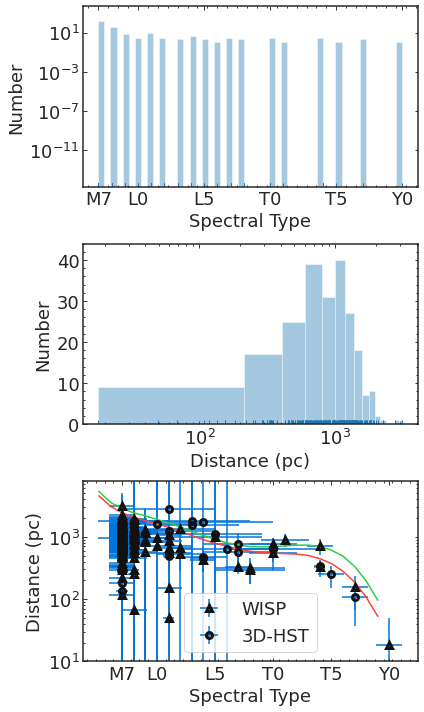

In [71]:
fig, (ax, ax1, ax2)=plt.subplots(nrows=3, figsize=(6, 10))
sns.distplot(ucds.spt, kde=False, ax=ax, rug=True, hist_kws={'align': 'mid'})
ax.set_xlabel('Spectral Type', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.minorticks_on()
ax.set_yscale('log')


sns.distplot(ucds.distance, kde=False, ax=ax1, rug=True, hist_kws={'align': 'mid'})
plt.tight_layout()
ax1.set_xlabel('Distance (pc)', fontsize=18)
ax1.set_ylabel('Number', fontsize=18)
ax1.minorticks_on()
ax1.set_xscale('log')

#for a in [ax, ax1]:
ax.set_xticks([17, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])



#ax2.plot(sp_grid, d_limitsdict.values, c='#FF4136', linestyle='--')
ax2.plot(sp_grid,  corrected_limits.values, c='#FF4136')
ax2.plot(sp_grid, new_corrected_limits.values, c='#2ECC40')

ax2.errorbar(wispsucd.spt, wispsucd.distance, 
             yerr=np.abs(np.vstack(wispsucd.distance_er.values).T) ,
             xerr= wispsucd.spt_er, label='WISP', fmt='^',  
             mec='#111111', mfc='none', mew=3, rasterized=True, c='#0074D9')
ax2.errorbar(hst3ducd.spt, hst3ducd.distance,\
             yerr=np.abs(np.vstack(hst3ducd.distance_er.values).T),\
              xerr= hst3ducd.spt_er, label='3D-HST', fmt='o',\
             mec='#111111',  mfc='none', mew=3, rasterized=True, c='#0074D9')
ax2.legend()


ax2.set_yscale('log')
ax2.set_ylabel('Distance (pc)', fontsize=18)
ax2.set_xlabel('Spectral Type', fontsize=18)

ax2.minorticks_on()

ax2.set_ylim([10, 8000])
ax2.set_xticks([17, 20, 25, 30, 35, 40])
ax2.set_xticklabels(['M7', 'L0', 'L5', 'T0', 'T5', 'Y0'])

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/sptdistribution.pdf',  bbox_inches='tight')

In [72]:
#np.vstack(wispsucd.distance_er.values).T 

(array([136.,  41.,   8.,   3.,  10.,   3.,   2.,   4.,   2.,   1.,   3.,
          2.,   0.,   3.,   1.,   0.,   0.,   3.,   1.,   0.,   2.,   0.,
          1.]),
 array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
        30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.]),
 <BarContainer object of 23 artists>)

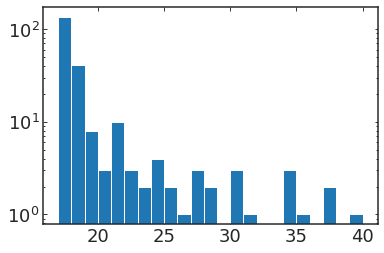

In [73]:
plt.hist(ucds.spt, log=True, bins=23)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


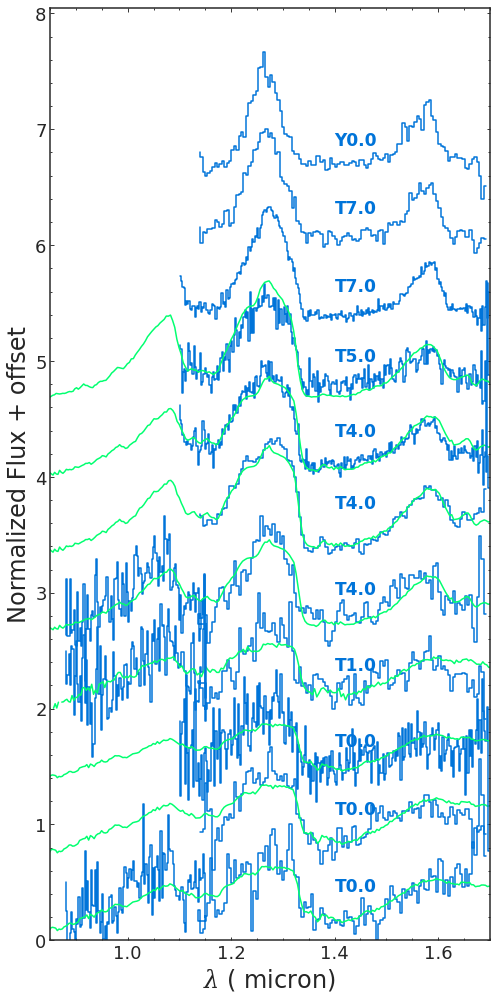

In [74]:
fig, ax=plt.subplots(figsize=(7, 14))

for  idx, y in enumerate(tdwarfs.spectra):
    x=y.splat_spectrum
    
    if x.wave.value.min()< 0.9:
        x.trim([0.88, 1.7])
        
    if x.wave.value.min()>0.9:
        x.trim([1.1, 1.7])
  
    std= splat.STDS_DWARF_SPEX[splat.typeToNum(y.spectral_type[0])]
    
    std.normalize(waverange=[1.15, 1.65])
    x.normalize(waverange=[1.15, 1.65])
    

    
    med0=(x.flux.value[np.logical_and(x.wave.value >1.15, x.wave.value <1.65) ]).mean()
    med1=(std.flux.value[np.logical_and(std.wave.value >1.15, std.wave.value <1.65) ]).mean()
    
    std.scale(med0/med1)
    
    plt.text(1.4, (x.flux.value+idx/1.5).mean(),splat.typeToNum(y.spectral_type[0]),
             {'fontsize':17, 'weight': 'bold'}, color='#0074D9')
    
    
    plt.step(x.wave.value, x.flux.value+idx/1.5, c='#0074D9')
    plt.plot(std.wave.value, std.flux.value+ idx/1.5, c='#01FF70')
    plt.ylim([0., 8.05])
    plt.xlim([0.85, 1.7])
    
plt.minorticks_on()
 
#mplcyberpunk.make_lines_glow(ax)
    
ax.set_xlabel(r'$\lambda$ ( micron)', fontsize=24)
ax.set_ylabel(r'Normalized Flux + offset', fontsize=24)

plt.tight_layout()  
#mplcyberpunk.add_underglow()
#mplcyberpunk.make_lines_glow(ax)
plt.savefig(wisps.OUTPUT_FIGURES+'/tdwarfsequence.pdf')

In [75]:
#nnselection

226

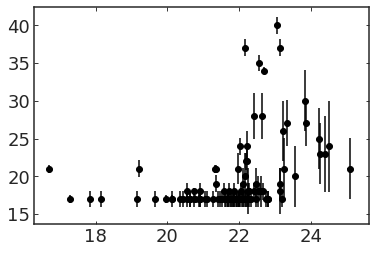

In [76]:


plt.errorbar(ucds.F140W, ucds.spt, xerr=ucds.F140W_er, yerr=ucds.spt_er, 
             fmt='o', c='k', label='WISP')


len(ucds)

In [77]:
ucds['f_test']=ucds.spectra.apply(lambda x: x.f_test)
ucds['dof']=ucds.spectra.apply(lambda x: x.dof)
ucds['line_chi']=ucds.spectra.apply(lambda x: x.line_chi)
ucds['spex_chi']=ucds.spectra.apply(lambda x: x.spex_chi)
ucds['wavenumber']=ucds.spectra.apply(lambda x:len(x.wave))

In [78]:

%%capture
fold='/Users/caganze/research/wisps/figures/ltwarfs/'
ids=0
for idx, row in ucds.iterrows():
    try:
        s=row.spectra
        filename=fold+'spectrum'+str(ids)+'.pdf'
        s.pixels_per_image=100
        s.plot(save=True, filename=filename)
        ids=ids+1
    except:
        s=wisps.Source(filename=row.grism_id.replace('g141', 'G141'),is_ucd=False )
        s.pixels_per_image=100
        filename=fold+'spectrum'+str(ids)+'.pdf'
        s.plot(save=True, filename=filename)
        ids=ids+1

IndexError: list index out of range

In [79]:
len(ucds)

226

In [80]:
import wisps.simulations as wispsim


In [81]:
px=wisps.POLYNOMIAL_RELATIONS['abs_mags']['F110W'][0]

In [82]:
wisps.POLYNOMIAL_RELATIONS['colors']['h_f160']

(poly1d([-7.39154244e-08,  1.20849297e-05, -8.07613590e-04,  2.82474542e-02,
        -5.44112262e-01,  5.43443351e+00, -2.20742508e+01]),
 0.09817196023416651)

In [83]:
#px=np.poly1d(np.flip([6.4E-07, -9.1E-05, 5.2E-03, -1.6E-01, \
#                      .6E+00, -2.1E+01, 7.1E+01]))

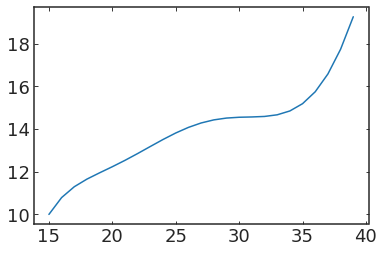

In [84]:
plt.plot(np.arange(15, 40, 1), px(np.arange(15, 40, 1)))

In [85]:
ucds['med_dist_er']=np.nanmedian(np.vstack(ucds.distance_er.values), axis=1)

In [86]:
ms=ucds[ucds.spt.between(16,19)]
ls=ucds[ucds.spt.between(20,29)]
ts=ucds[ucds.spt.between(30,45)]


In [87]:
ts[ts.med_dist_er/ts.distance <0.6].sort_values('distance')[['designation', 'distance', \
                                                             'distance_er', 'spt', 'spt_er']]

,designation,distance,distance_er,spt,spt_er
224,J12324241-0033067,153.615109,"[85.90354360896436, 78.18712312940497]",37.0,1.118034
222,J03323881-2749536,248.289059,"[95.7816753855374, 90.73475778132035]",35.0,1.118034
220,J03074119-7243574,329.447885,"[71.24803981075303, 72.35131253762097]",34.0,0.500000
221,J14185040+5242593,333.979660,"[107.80619447575333, 86.07470259226494]",34.0,0.500000
216,J10034053+2854461,546.605061,"[146.0329131039406, 150.40766503478795]",30.0,2.061553
217,J10003503+0217012,643.644792,"[352.20694281791486, 323.8788227870088]",30.0,4.031129
219,J04375775-1106158,714.860021,"[206.42757653813032, 196.64470583932814]",34.0,1.118034
215,J03260271-1643210,771.249166,"[195.50981084847808, 176.40684305009586]",30.0,2.061553
218,J11151423+5257050,904.842705,"[230.3763475578544, 221.0015269018537]",31.0,2.061553


ms.spt_er 

In [88]:
870-(123-20-7-7-4)

785

In [89]:
splat.ABSMAG_LBOL_RELATIONS

{'dupuy2017': {'altname': ['dupuy17', 'dupuy'],
  'bibcode': '2017ApJS..231...15D',
  'method': 'polynomial',
  'filters': {'MKO_H': {'fitunc': 0.023,
    'range': [9.6, 13.3],
    'coeff': [0.01062, -0.351721, 34.6876, -13.282]},
   'MKO_K': {'fitunc': 0.05,
    'range': [9.1, 17.8],
    'coeff': [0.000454547,
     -0.03068824,
     0.8162709,
     -10.671188,
     68.11147,
     -172.188]},
   '2MASS_H': {'fitunc': 0.023,
    'range': [9.2, 13.3],
    'coeff': [0.0089222, -0.290797, 2.74259, -10.426]},
   '2MASS_KS': {'fitunc': 0.05,
    'range': [8.8, 16.6],
    'coeff': [9.8821e-05,
     -0.00785837,
     0.2357643,
     -3.364101,
     22.58776,
     -59.877]}}}}